## Import the various packages

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
%matplotlib inline

## Import the videos file

In [21]:
## read in the videos csv file

vid_df = pd.read_csv('FYMarksMinutes2.csv')

## create the features dataframe by extracting the first 80 columns
vid_feat = vid_df.iloc[:,0:80]

# create the target by extracting the last column
vid_targ = vid_df.iloc[:,-1]


## Do some exploratory data analysis.  First we look at the stats

In [65]:
## here we simply look at the stats for each feature,  This includes
## number, mean, std dev and maximum value.
vid_stats = vid_feat.describe()

vid_stats

,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.621946,0.532912,0.538916,0.598545,0.609287,0.634968,0.623486,0.198323,0.882524,0.428481,...,0.203423,0.310790,0.445735,0.370372,0.314818,0.423229,0.256460,0.283405,0.341437,0.310429
std,0.948981,0.855915,0.878434,0.942386,0.921476,0.905007,0.937404,0.379432,1.449065,0.781260,...,0.399286,0.568949,0.627356,0.558933,0.568399,0.614797,0.540578,0.558874,0.564088,0.638683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.001337,1.000461,1.000674,0.998138,1.000246,1.000431,1.000744,0.355074,1.843471,0.969519,...,0.211608,0.574640,0.999995,0.991386,0.700227,0.998633,0.045712,0.272860,0.968338,0.252539
max,7.661943,6.006252,6.241262,9.652560,5.981698,6.076791,7.372793,2.704304,11.599915,7.059483,...,3.006277,4.005868,4.001116,3.327058,4.000648,3.753324,5.473231,5.031521,3.894914,5.332062


## Correlation tests with heatmap

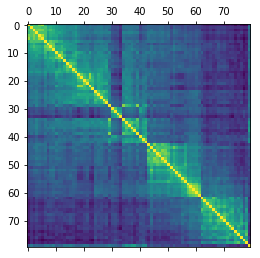

In [23]:
correl = vid_feat.corr()
plt.matshow(correl)

## We can split up the data to train and test

In [24]:
## univariate statistics
##  correlation, anova
## set up the train and test data
X_train, X_test, y_train, y_test = train_test_split(vid_feat, vid_targ, random_state = 0)

print('X_test shape is{} '.format(X_test.shape))
print('y_test shape is{}'.format(y_test.shape))
print('X_train shape is{}'.format(X_train.shape))
print('y_train shape is{}'.format(y_train.shape))

X_test shape is(178, 80) 
y_test shape is(178,)
X_train shape is(534, 80)
y_train shape is(534,)


## Implement SelectPercentile which is to choose features in the model that has the highest
## f-value in an ANOVA test 

In [25]:
## implement the Univariate thing

select =  SelectPercentile(percentile = 10)  ## instantiate the model, create an instance
#select.fit(X_train, y_train)
select.fit(vid_feat,vid_targ)
#X_train_selected = select.transform(X_train)
feat_sel = select.transform(vid_feat)

#print('X train shape: {}'.format(X_train.shape))
#print('X train sel shape: {}'.format(X_train_selected.shape))

[False False False False False False False False False False False False
 False False  True False False  True False False False False False False
  True False False False False False False False False False False False
 False False False  True  True False False False False False False False
 False False False False False False False False False  True False False
  True  True False False False False False False False False False False
 False False False False False False False False]


array([14, 17, 24, 39, 40, 57, 60, 61], dtype=int64)

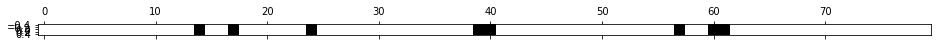

In [26]:
#print out the results for the feature selection method
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
np.where(mask)[0]  ## this pulls out the index of the 

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif




[False False False  True False False False False  True False False  True
 False False  True False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False  True False False False  True False  True
  True False False False False False False False False False False False
 False False False False False False False False]


array([ 3,  8, 11, 14, 17, 40, 53, 57, 59, 60], dtype=int64)

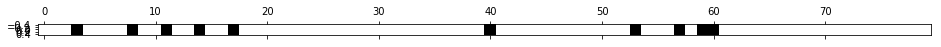

In [28]:
## Use SelectKBest with various statistical tests
## such as chi^2 and ANOVA F-test
##  I WILL MAKE USE OF SELECTKBEST FOR NOW
select2 = SelectKBest(chi2, k = 10)
select2.fit(X_train,y_train)

X_train_reduced = select2.transform(X_train)
mask2 = select2.get_support()
print(mask2)
plt.matshow(mask2.reshape(1,-1), cmap = 'gray_r')
np.where(mask2)[0]  ## this pulls out the index of the 

##  Compare baseline models with all features and top 10 features
## We will use logistic regression as our baseline

In [15]:
from sklearn.linear_model import LinearRegression

In [29]:
##  Just look at the shapes of the two DFs
print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_reduced is{}'.format(X_train_reduced.shape))

The shape of X_train is (534, 80)
The shape of X_reduced is(534, 10)


In [32]:
##  instantiate and fit logreg
## we need to first also transform X_test into the same number of features
X_test_reduced = select2.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)  #  training on the original training set
print('Score of LR on original features{:.3f}'.format(linreg.score(X_test, y_test)))



## TRAIN LINREG ON REDUCED DATA
linreg.fit(X_train_reduced, y_train)
# NEED TO CALCULATE THE ADJUSTED R2 VALUE

n = X_train.shape[0]
p = X_train.shape[1]

R2 = linreg.score(X_test_reduced, y_test)

adjR2 = 1-(1-R2)*(n-1)/(n-p-1)
print('R2 of LR on reduced features : %f ' %R2)
print('Adjusted R2 of LR on reduced features:%f ' %adjR2 )




Score of LR on original features-0.018
R2 of LR on reduced features : -0.070293 
Adjusted R2 of LR on reduced features:-0.259307 


##  Model based feature selection

In [56]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [60]:
select3 = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = 'median')
select3.fit(X_train, y_train)
X_train_s = select3.transform(X_train)
print('X_train shape ', X_train.shape)
print('X_train_s', X_train_s.shape)

X_train shape  (534, 80)
X_train_s (534, 40)


Text(0.5,0,'Index of features')

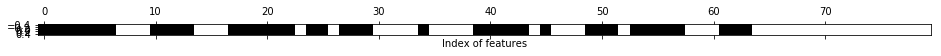

In [61]:
mask = select3.get_support()
plt.matshow(mask.reshape(1,-1), cmap ='gray_r')
plt.xlabel('Index of features')

In [62]:
X_test_s = select3.transform(X_test)
score = LinearRegression().fit(X_train_s, y_train).score(X_test_s, y_test)
print('Log reg score of reduced set is {}'.format(score))

Log reg score of reduced set is -0.018009030660836034
